In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/df_transformed.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'LBXTC', 'RIAGENDR', 'RIDRETH3', 'RIDAGEYR', 'BMXWT',
       'BMXHT', 'BMXBMI', 'BPXPLS', 'BPXPULS', 'DR1TKCAL', 'DR1TPROT',
       'DR1TCARB', 'DR1TSUGR', 'DR1TFIBE', 'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT',
       'DR1TPFAT', 'DR1TCHOL', 'DR1TSODI', 'DR1TVD', 'DR1TCALC', 'DR1TIRON',
       'DR1TPOTA', 'DR1_300', 'ALQ120Q', 'ALQ120U', 'ALQ130', 'BPQ020',
       'BPQ050A', 'BPQ080', 'BPQ100D', 'DIQ010', 'MCQ170M', 'SMQ681', 'PAQ610',
       'PAD615', 'PAQ625', 'PAD630', 'PAQ655', 'PAD660', 'PAQ670', 'PAD675',
       'Systolic', 'Diastolic', 'MET_work', 'MET_rec', 'DR1TKCAL_t',
       'DR1TPROT_t', 'DR1TCARB_t', 'DR1TSUGR_t', 'DR1TFIBE_t', 'DR1TTFAT_t',
       'DR1TSFAT_t', 'DR1TMFAT_t', 'DR1TPFAT_t', 'DR1TCHOL_t', 'DR1TSODI_t',
       'DR1TVD_t', 'DR1TCALC_t', 'DR1TIRON_t', 'DR1TPOTA_t'],
      dtype='object')

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4644 entries, 0 to 4643
Data columns (total 62 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LBXTC       4644 non-null   float64
 1   RIAGENDR    4644 non-null   float64
 2   RIDRETH3    4644 non-null   float64
 3   RIDAGEYR    4644 non-null   float64
 4   BMXWT       4622 non-null   float64
 5   BMXHT       4619 non-null   float64
 6   BMXBMI      4614 non-null   float64
 7   BPXPLS      4567 non-null   float64
 8   BPXPULS     4568 non-null   float64
 9   DR1TKCAL    4644 non-null   float64
 10  DR1TPROT    4644 non-null   float64
 11  DR1TCARB    4644 non-null   float64
 12  DR1TSUGR    4644 non-null   float64
 13  DR1TFIBE    4644 non-null   float64
 14  DR1TTFAT    4644 non-null   float64
 15  DR1TSFAT    4644 non-null   float64
 16  DR1TMFAT    4644 non-null   float64
 17  DR1TPFAT    4644 non-null   float64
 18  DR1TCHOL    4644 non-null   float64
 19  DR1TSODI    4644 non-null  

# Total Cholesterol

<AxesSubplot:>

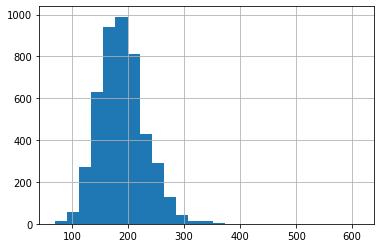

In [6]:
df.LBXTC.hist(bins=25)

Total cholesterol is right skewed with a mean of just less than 200.  There are some definite outliers.  Looking at the data when it is log transformed...

(array([  1.,   4.,   6.,   9.,  28.,  41., 125., 227., 389., 542., 681.,
        723., 762., 471., 337., 186.,  73.,  23.,  11.,   1.,   0.,   2.,
          0.,   1.,   1.]),
 array([4.2341065 , 4.32141154, 4.40871657, 4.4960216 , 4.58332663,
        4.67063166, 4.75793669, 4.84524172, 4.93254675, 5.01985178,
        5.10715682, 5.19446185, 5.28176688, 5.36907191, 5.45637694,
        5.54368197, 5.630987  , 5.71829203, 5.80559706, 5.8929021 ,
        5.98020713, 6.06751216, 6.15481719, 6.24212222, 6.32942725,
        6.41673228]),
 <BarContainer object of 25 artists>)

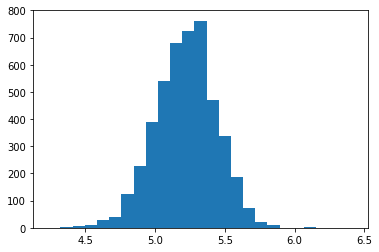

In [7]:
plt.hist(np.log(df.LBXTC),bins=25)

The distribution is now more symmetric.  I will have to decide if I want to log transform the dependant variable.

In [8]:
df.LBXTC.describe()

count    4644.000000
mean      189.389320
std        41.909269
min        69.000000
25%       160.000000
50%       186.000000
75%       213.000000
max       612.000000
Name: LBXTC, dtype: float64

# Demographics

## Gender

In [9]:
df.RIAGENDR.value_counts()

2.0    2374
1.0    2270
Name: RIAGENDR, dtype: int64

<AxesSubplot:xlabel='RIAGENDR', ylabel='LBXTC'>

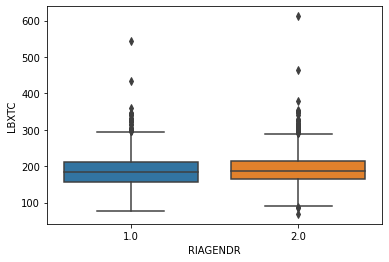

In [10]:
sns.boxplot(x='RIAGENDR',y='LBXTC',data=df)

Looking at gender and total cholesterol, the boxplot shows the medians and quartiles are relatively the same.  However femals, 2, have farther outliers than males.

## Race

In [11]:
df.RIDRETH3.value_counts()

3.0    1852
4.0     940
1.0     700
2.0     525
6.0     485
7.0     142
Name: RIDRETH3, dtype: int64

The value counts show the most are white while the least are of some other race.  Looking at total cholesterol and race...

<AxesSubplot:xlabel='RIDRETH3', ylabel='LBXTC'>

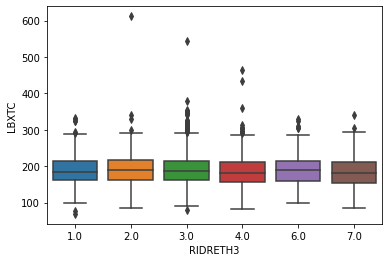

In [12]:
sns.boxplot(x='RIDRETH3',y='LBXTC',data=df)

Again boxplots appear similar, however 'other hispanics' have the highest outliers followed by whites and then blacks.

## Age

<AxesSubplot:>

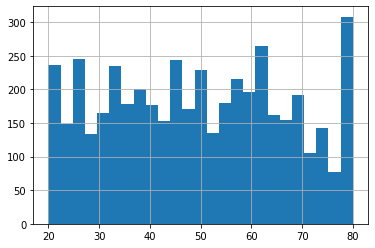

In [13]:
df.RIDAGEYR.hist(bins=25)

Various ages between 20 and 80.  Age was capped at 80 so anyone older was recorded as 80.  Looking at age and cholesterol level.

<AxesSubplot:xlabel='RIDAGEYR', ylabel='LBXTC'>

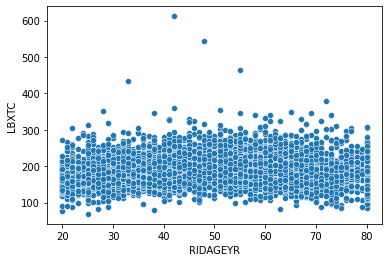

In [14]:
sns.scatterplot(x='RIDAGEYR',y='LBXTC',data=df)

From the scatterplot, it looks like the average for total cholesterol may increase around age 50.  Placing ages in bins and then using boxplots...

<AxesSubplot:xlabel='RIDAGEYR', ylabel='LBXTC'>

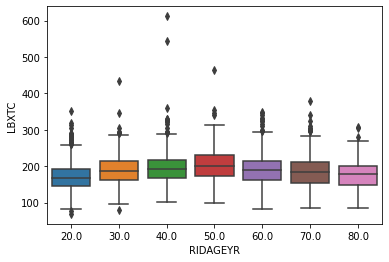

In [15]:
decade = np.floor(df['RIDAGEYR']/10)*10
sns.boxplot(x=decade,y=df.LBXTC)

As can be seen on the graph, the total cholesterol increases at age 50 then slightly decreases.  The reason for this may be that older adults are on medications to treat cholesterol.

## Body measures

## Weight

<AxesSubplot:>

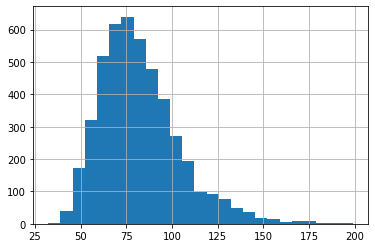

In [16]:
df.BMXWT.hist(bins=25)

Weight appears right skewed with a mean of around 75 kg.

In [17]:
df.BMXWT.describe()

count    4622.000000
mean       82.338468
std        22.090378
min        32.300000
25%        66.800000
50%        78.900000
75%        93.900000
max       198.900000
Name: BMXWT, dtype: float64

<AxesSubplot:xlabel='BMXWT', ylabel='LBXTC'>

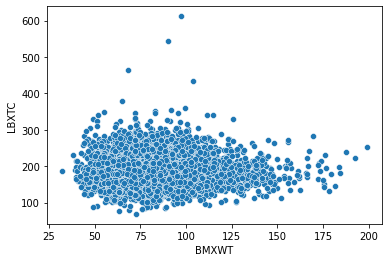

In [18]:
sns.scatterplot(x='BMXWT',y='LBXTC',data=df)

As can be seen when weight gets really large, total cholesterol increases.

## Height

<AxesSubplot:>

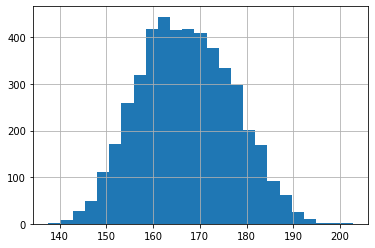

In [19]:
df.BMXHT.hist(bins=25)

In [20]:
df.BMXHT.describe()

count    4619.000000
mean      167.105270
std         9.987638
min       137.600000
25%       159.800000
50%       166.800000
75%       174.300000
max       202.700000
Name: BMXHT, dtype: float64

<AxesSubplot:xlabel='BMXHT', ylabel='LBXTC'>

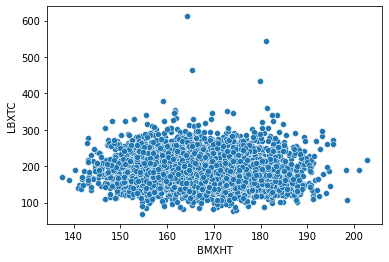

In [21]:
sns.scatterplot(x='BMXHT',y='LBXTC',data=df)

There doesn't seem to be much relation between height and total cholesterol

## BMI

<AxesSubplot:>

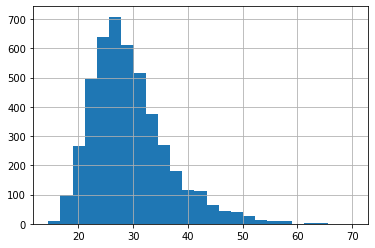

In [22]:
df.BMXBMI.hist(bins=25)

BMI is right skewed with a mean around 25

In [23]:
df.BMXBMI.describe()

count    4614.000000
mean       29.403836
std         7.168323
min        14.500000
25%        24.300000
50%        28.200000
75%        33.000000
max        70.100000
Name: BMXBMI, dtype: float64

<AxesSubplot:xlabel='BMXBMI', ylabel='LBXTC'>

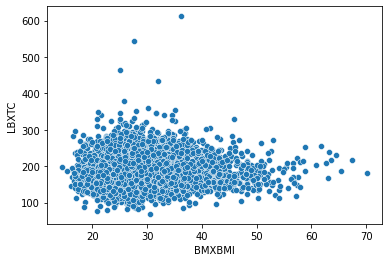

In [24]:
sns.scatterplot(x='BMXBMI',y='LBXTC',data=df)

Like with weight, as you see BMI increasing total cholesterol also increases.  Since BMI is calculated from height and weight I haven't decided if I just want to use bmi or if I want to use height and weight or maybe weight and bmi.

## Resting pulse

<AxesSubplot:>

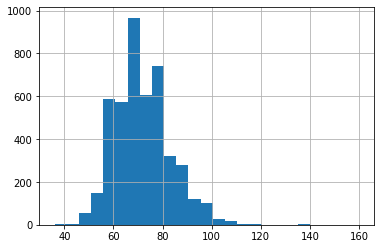

In [25]:
df.BPXPLS.hist(bins=25)

In [26]:
df.BPXPLS.describe()

count    4567.000000
mean       71.769652
std        11.593019
min        36.000000
25%        64.000000
50%        70.000000
75%        78.000000
max       160.000000
Name: BPXPLS, dtype: float64

<AxesSubplot:xlabel='BPXPLS', ylabel='LBXTC'>

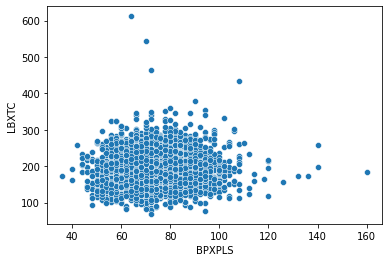

In [27]:
sns.scatterplot(x='BPXPLS',y='LBXTC',data=df)

It does appear as the pulse greatly increases, the total cholesterol increases.

## Irregular pulse

In [28]:
df.BPXPULS.value_counts()

1.0    4455
2.0     113
Name: BPXPULS, dtype: int64

More people are shown to have a regular pulse. 

<AxesSubplot:xlabel='BPXPULS', ylabel='LBXTC'>

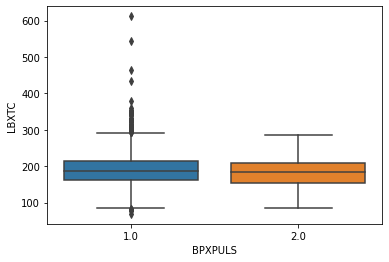

In [29]:
sns.boxplot(x='BPXPULS',y='LBXTC',data=df)

There isn't much difference of those with a regular pulse and those without, except those without an irregular pulse have more outliers. I will probably not include this variable in my models.

# Nutrition information

## Calories

<AxesSubplot:>

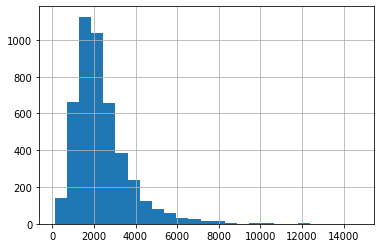

In [81]:
df.DR1TKCAL_t.hist(bins=25)

The graph is skewed to the right

<AxesSubplot:xlabel='DR1TKCAL_t', ylabel='LBXTC'>

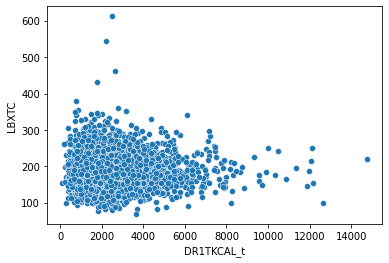

In [82]:
sns.scatterplot(x='DR1TKCAL_t',y='LBXTC',data=df)

As the daily amount of calories increase, the total cholesterol seems to increase

## Protein

<AxesSubplot:>

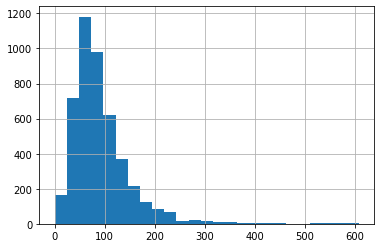

In [83]:
df.DR1TPROT_t.hist(bins=25)

The amount of protein in the diet is also right skewed. 

<AxesSubplot:xlabel='DR1TPROT_t', ylabel='LBXTC'>

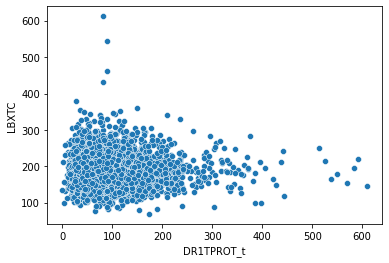

In [84]:
sns.scatterplot(x='DR1TPROT_t',y='LBXTC',data=df)

Again as the protein increases there is an increase in total cholesterol

## Carbohydrates

<AxesSubplot:>

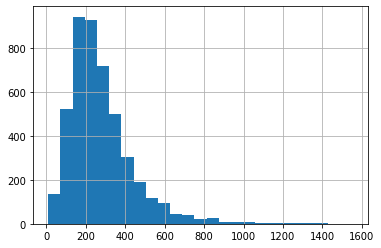

In [85]:
df.DR1TCARB_t.hist(bins=25)

<AxesSubplot:xlabel='DR1TCARB_t', ylabel='LBXTC'>

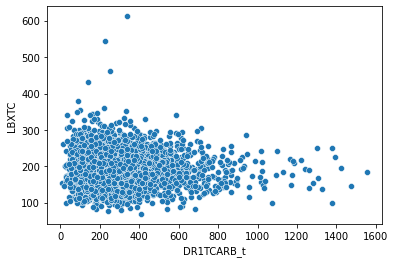

In [86]:
sns.scatterplot(x='DR1TCARB_t',y='LBXTC',data=df)

Again the distribution is right skewed and as the amount of carbohydrates increases, the total cholesterol seems to increase.

## Sugar

<AxesSubplot:>

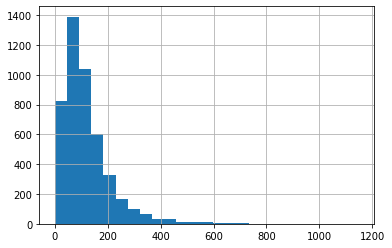

In [87]:
df.DR1TSUGR_t.hist(bins=25)

<AxesSubplot:xlabel='DR1TSUGR_t', ylabel='LBXTC'>

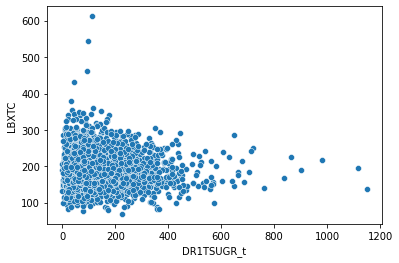

In [88]:
sns.scatterplot(x='DR1TSUGR_t',y='LBXTC',data=df)

## Dietary Fiber

<AxesSubplot:>

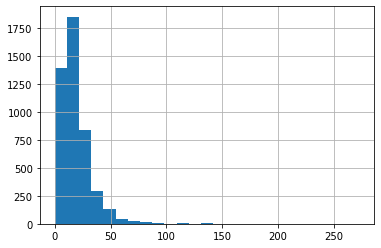

In [89]:
df.DR1TFIBE_t.hist(bins=25)

<AxesSubplot:xlabel='DR1TFIBE_t', ylabel='LBXTC'>

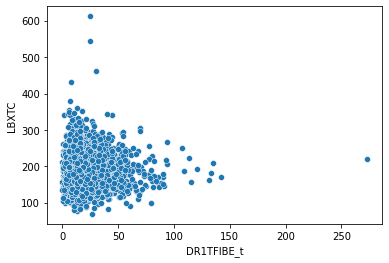

In [90]:
sns.scatterplot(x='DR1TFIBE_t',y='LBXTC',data=df)

## Total Fat

<AxesSubplot:>

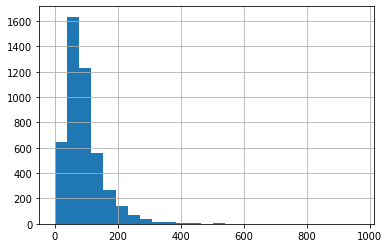

In [91]:
df.DR1TTFAT_t.hist(bins=25)

<AxesSubplot:xlabel='DR1TTFAT_t', ylabel='LBXTC'>

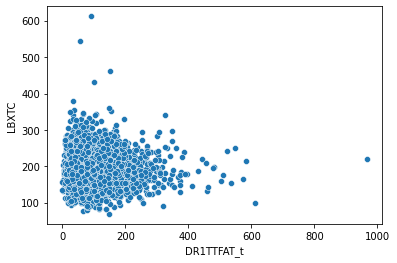

In [92]:
sns.scatterplot(x='DR1TTFAT_t',y='LBXTC',data=df)

## Saturated Fat

<AxesSubplot:>

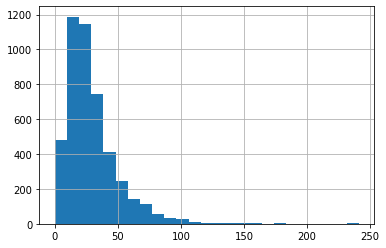

In [93]:
df.DR1TSFAT_t.hist(bins=25)

<AxesSubplot:xlabel='DR1TSFAT_t', ylabel='LBXTC'>

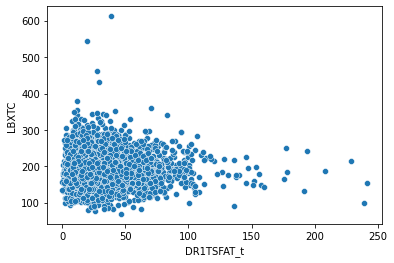

In [94]:
sns.scatterplot(x='DR1TSFAT_t',y='LBXTC',data=df)

## Monounsaturated fats

<AxesSubplot:>

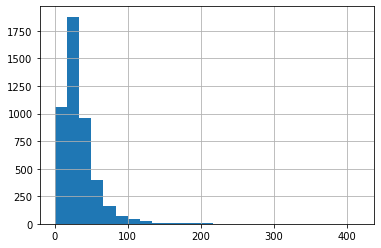

In [95]:
df.DR1TMFAT_t.hist(bins=25)

<AxesSubplot:xlabel='DR1TMFAT_t', ylabel='LBXTC'>

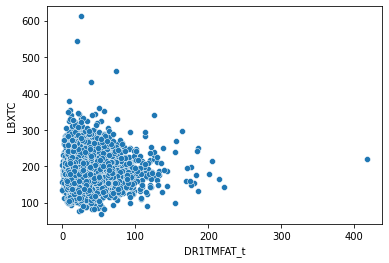

In [96]:
sns.scatterplot(x='DR1TMFAT_t',y='LBXTC',data=df)

## Polyunsaturated fats

<AxesSubplot:>

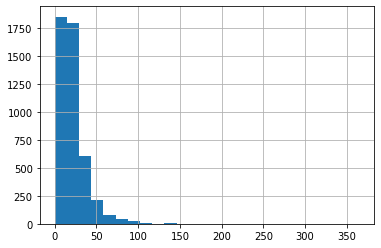

In [97]:
df.DR1TPFAT_t.hist(bins=25)

<AxesSubplot:xlabel='DR1TPFAT_t', ylabel='LBXTC'>

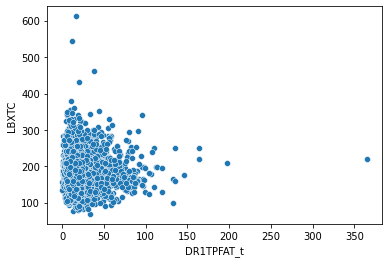

In [98]:
sns.scatterplot(x='DR1TPFAT_t',y='LBXTC',data=df)

## Cholesterol

<AxesSubplot:>

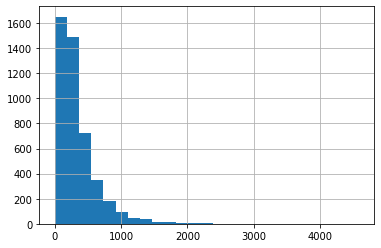

In [99]:
df.DR1TCHOL_t.hist(bins=25)

<AxesSubplot:xlabel='DR1TCHOL_t', ylabel='LBXTC'>

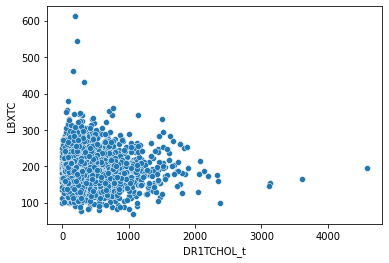

In [100]:
sns.scatterplot(x='DR1TCHOL_t',y='LBXTC',data=df)

## Sodium

<AxesSubplot:>

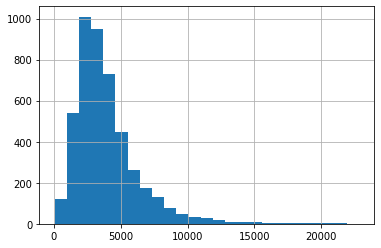

In [101]:
df.DR1TSODI_t.hist(bins=25)

<AxesSubplot:xlabel='DR1TSODI_t', ylabel='LBXTC'>

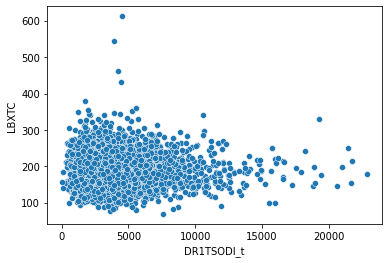

In [102]:
sns.scatterplot(x='DR1TSODI_t',y='LBXTC',data=df)

## Vitamin D

<AxesSubplot:>

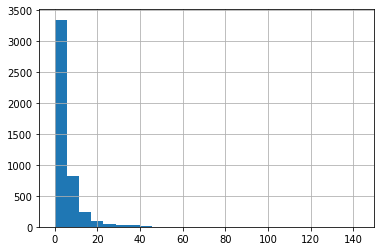

In [103]:
df.DR1TVD_t.hist(bins=25)

<AxesSubplot:xlabel='DR1TVD_t', ylabel='LBXTC'>

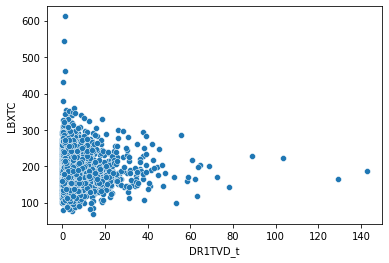

In [104]:
sns.scatterplot(x='DR1TVD_t',y='LBXTC',data=df)

## Calcium

<AxesSubplot:>

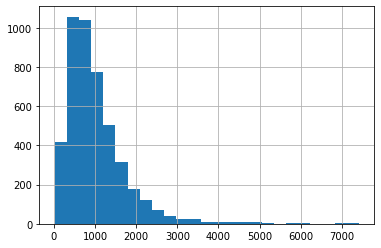

In [105]:
df.DR1TCALC_t.hist(bins=25)

<AxesSubplot:xlabel='DR1TCALC_t', ylabel='LBXTC'>

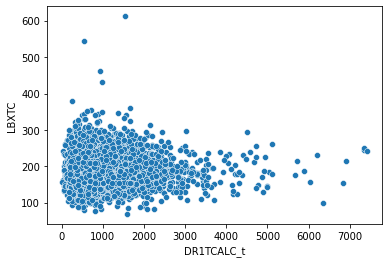

In [106]:
sns.scatterplot(x='DR1TCALC_t',y='LBXTC',data=df)

## Iron

<AxesSubplot:>

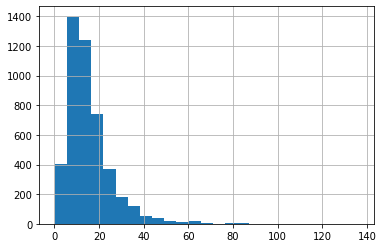

In [107]:
df.DR1TIRON_t.hist(bins=25)

<AxesSubplot:xlabel='DR1TIRON_t', ylabel='LBXTC'>

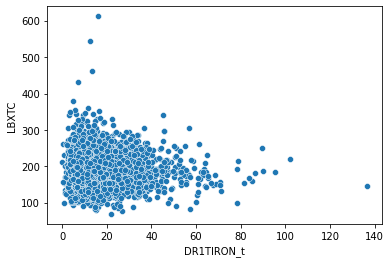

In [108]:
sns.scatterplot(x='DR1TIRON_t',y='LBXTC',data=df)

## Potassium

<AxesSubplot:>

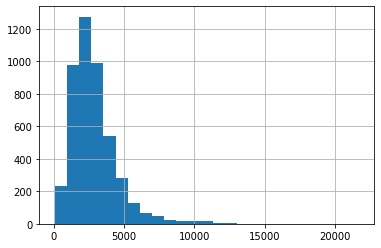

In [109]:
df.DR1TPOTA_t.hist(bins=25)

<AxesSubplot:xlabel='DR1TPOTA_t', ylabel='LBXTC'>

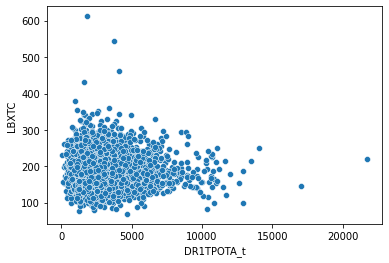

In [110]:
sns.scatterplot(x='DR1TPOTA_t',y='LBXTC',data=df)

## Comparison of food eaten yesterday to usual
DR1_300 asks how the amount of food consumed compares to usual with values of

1 -- Much more than usual
2 -- usual
3 -- Much less than usual
7 -- Refused
9 -- Don't know

I am not sure how I will handle this. Two possibilities that I plan to try
1 -- keep the original values for nutrients and include this information
2 -- use this information to adjust nutrient values

In [111]:
df.DR1_300.value_counts()

2.0    3298
3.0     916
1.0     410
Name: DR1_300, dtype: int64

# Alcohol comsumption

ALQ120Q asks how often you drink in the past twelve months where ALQ120U gives the units for that question.  Looking first to ALQ120U

In [61]:
df.ALQ120U.value_counts()

1.0    1921
3.0     955
2.0     816
Name: ALQ120U, dtype: int64

1 represents per week, 2 represents per month, and 3 represents per year.  Filtering for each and then exploring

In [62]:
df[df.ALQ120U==1]['ALQ120Q'].value_counts()

0.0    691
1.0    381
2.0    288
3.0    201
7.0    139
5.0    110
4.0     82
6.0     29
Name: ALQ120Q, dtype: int64

Looking at alcohol consumed on a weekly basis and cholesterol.  Note: those with a value of 00 may have been filled in due to not drinking so I'm skipping those

<AxesSubplot:xlabel='ALQ120Q', ylabel='LBXTC'>

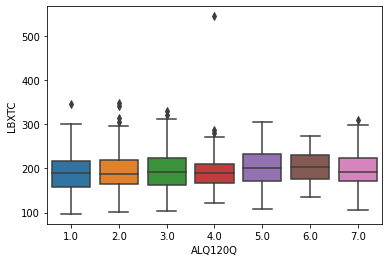

In [63]:
sns.boxplot(x=df[(df.ALQ120U==1)&(df.ALQ120Q>0)]['ALQ120Q'],y=df.LBXTC)

The boxplots seem to slightly increase as the number increases.  Looking at values per month...

In [64]:
df[df.ALQ120U==2]['ALQ120Q'].value_counts()

1.0     331
2.0     272
3.0      97
4.0      59
5.0      30
6.0       7
8.0       4
15.0      3
10.0      3
12.0      3
7.0       3
25.0      2
20.0      1
28.0      1
Name: ALQ120Q, dtype: int64

The majority drink once a month

<AxesSubplot:xlabel='ALQ120Q', ylabel='LBXTC'>

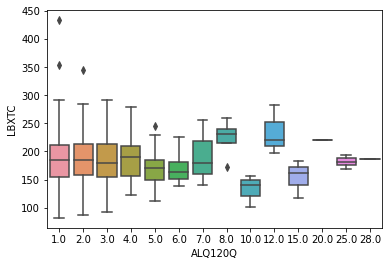

In [65]:
sns.boxplot(x=df[df.ALQ120U==2]['ALQ120Q'],y=df.LBXTC)

As the number of drinks increases total cholesterol becomes more variable.  Looking to the values given by year.

In [66]:
df[df.ALQ120U==3]['ALQ120Q'].value_counts()

2.0      184
1.0      166
3.0      132
4.0      107
5.0      102
6.0       77
10.0      55
12.0      23
7.0       21
8.0       15
20.0      14
15.0       9
30.0       9
14.0       6
24.0       5
9.0        4
365.0      3
60.0       2
25.0       2
80.0       2
35.0       2
16.0       2
52.0       1
160.0      1
150.0      1
100.0      1
90.0       1
45.0       1
96.0       1
11.0       1
19.0       1
350.0      1
50.0       1
180.0      1
48.0       1
Name: ALQ120Q, dtype: int64

Next, ALQ130 states the number of drinks per day on days you do drink.

<AxesSubplot:>

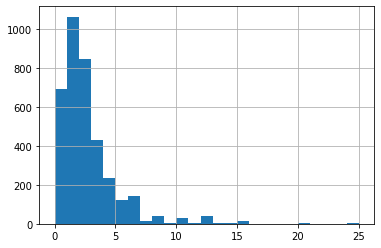

In [67]:
df.ALQ130.hist(bins=25)

<AxesSubplot:xlabel='ALQ130', ylabel='LBXTC'>

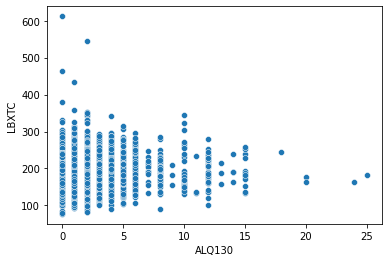

In [68]:
sns.scatterplot(x='ALQ130',y='LBXTC',data=df)

As the number of alcoholic drinks increases, the total cholesterol level on average seems to slightly increase.  

For these I am wondering if I just want to use ALQ130, or if I want to use this in concert with ALQ120 questions such that I multiply the number of drinks by 52 if it's weeks, or 12 if it's months then by ALQ130 and finally divide by 365 to get the average drinks per year.  Or should I leave alcohol out all together?


# Chronic conditions

When modeling, I plan to leave chronic conditions out at first and only add as needed as asking a person if they have these conditions would be an extra step for an app.

## High blood pressure

BPQ020 -- have you ever been told you have high blood pressure.

In [69]:
df.BPQ020.value_counts()

2.0    2893
1.0    1746
Name: BPQ020, dtype: int64

<AxesSubplot:xlabel='BPQ020', ylabel='LBXTC'>

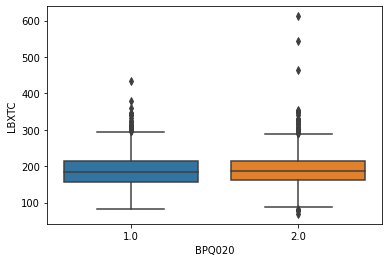

In [70]:
sns.boxplot(x='BPQ020',y='LBXTC',data=df)

Both plots are relatively the same with the exception of stronger outliers for those not told they have high blood pressure.

In [71]:
df.BPQ050A.value_counts()

2.0    3336
1.0    1301
Name: BPQ050A, dtype: int64

BPQ050A -- are you now taking medication for blood pressure?

<AxesSubplot:xlabel='BPQ050A', ylabel='LBXTC'>

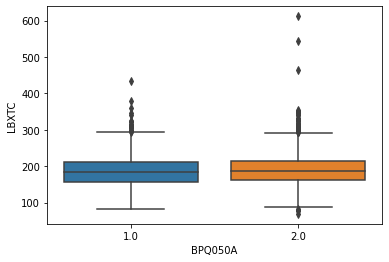

In [72]:
sns.boxplot(x='BPQ050A',y='LBXTC',data=df)

Again the boxplots are similar with the exception that those not taking medication for blood pressure have higher cholesterol.

## High Cholesterol

BPQ080 -- doctor told you you had high cholesterol

In [73]:
df.BPQ080.value_counts()

2.0    2951
1.0    1661
Name: BPQ080, dtype: int64

<AxesSubplot:xlabel='BPQ080', ylabel='LBXTC'>

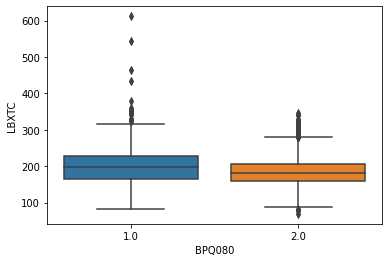

In [74]:
sns.boxplot(x='BPQ080',y='LBXTC',data=df)

Those that were not told they have high cholesterol have higher outliers as those that were told are probably doing something to control cholesterol.

BPQ100D -- now taking meds for cholesterol

In [75]:
df.BPQ100D.value_counts()

2.0    3776
1.0     843
Name: BPQ100D, dtype: int64

<AxesSubplot:xlabel='BPQ100D', ylabel='LBXTC'>

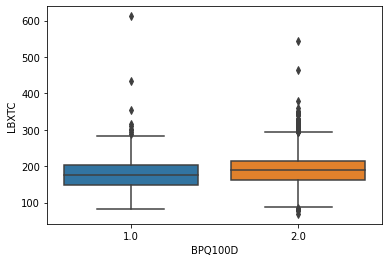

In [76]:
sns.boxplot(x='BPQ100D',y='LBXTC',data=df)

Interesting, those not on meds have more outliers but the largest outlier is taking meds.

## Diabetes

DIQ010 -- ever been told you have diabetes?
1 means yes, 2 means no, 3 means borderline

In [77]:
df.DIQ010.value_counts()

2.0    3894
1.0     613
3.0     136
Name: DIQ010, dtype: int64

<AxesSubplot:xlabel='DIQ010', ylabel='LBXTC'>

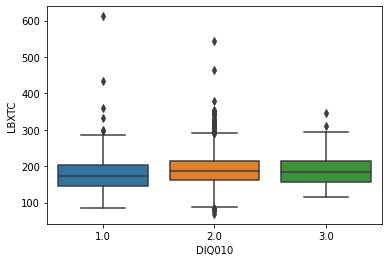

In [78]:
sns.boxplot(x='DIQ010',y='LBXTC',data=df)

Those that have been told they have diabetes have lower cholesterol on average.

## Thryoid conditions

MCQ170M asks if you still have thyroid problems

In [79]:
df.MCQ170M.value_counts()

2.0    4255
1.0     362
Name: MCQ170M, dtype: int64

<AxesSubplot:xlabel='MCQ170M', ylabel='LBXTC'>

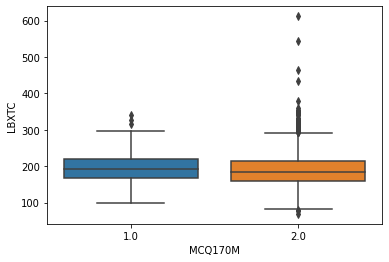

In [80]:
sns.boxplot(x='MCQ170M',y='LBXTC',data=df)

The medians are slightly higher for those that do have thyroid problems however those that don't have more outliers.

# Physical activity

<AxesSubplot:>

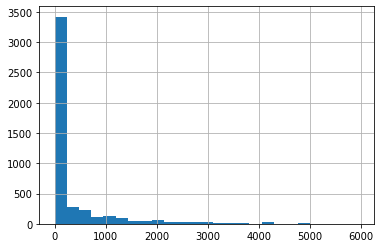

In [113]:
df.MET_work.hist(bins=25)

<AxesSubplot:xlabel='MET_work', ylabel='LBXTC'>

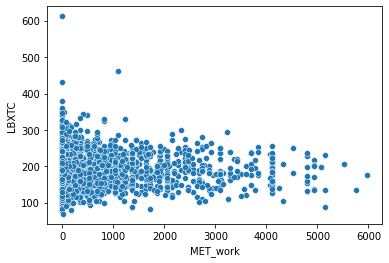

In [114]:
sns.scatterplot(x='MET_work',y='LBXTC',data=df)

<AxesSubplot:>

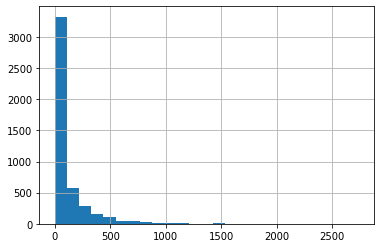

In [115]:
df.MET_rec.hist(bins=25)

<AxesSubplot:xlabel='MET_rec', ylabel='LBXTC'>

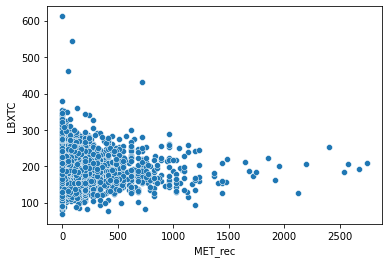

In [116]:
sns.scatterplot(x='MET_rec',y='LBXTC',data=df)

There looks to be an inverse variation where the cholesterol increases as the amount of activity decreases. 

It may be interesting to explore this.